# Decision Trees 1 - Visualization and hyperparameters

In [2]:
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import graphviz
from sklearn.tree import export_graphviz
import pydotplus

In this notebook, we use the DecisionTreeClassifier from sklearn to create and train a decision tree. 

We start by creating a toy dataset, which we will use to explore the main functionalities of decision trees:

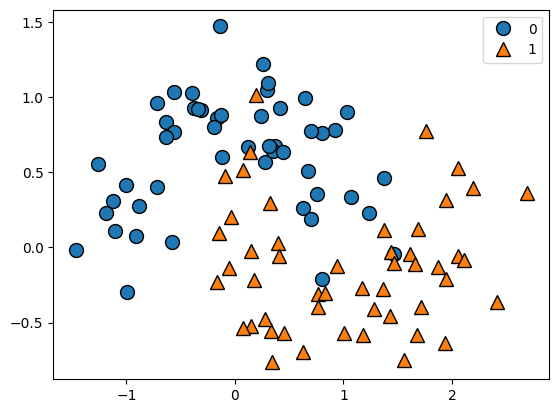

In [3]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend()

The data is split into a test and training set:

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                    random_state = 42)

We then instantiate the DecisionTreeClassifier, and fit it to the training data:

In [5]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

We can use the *graphviz* package to visualize the decision tree:

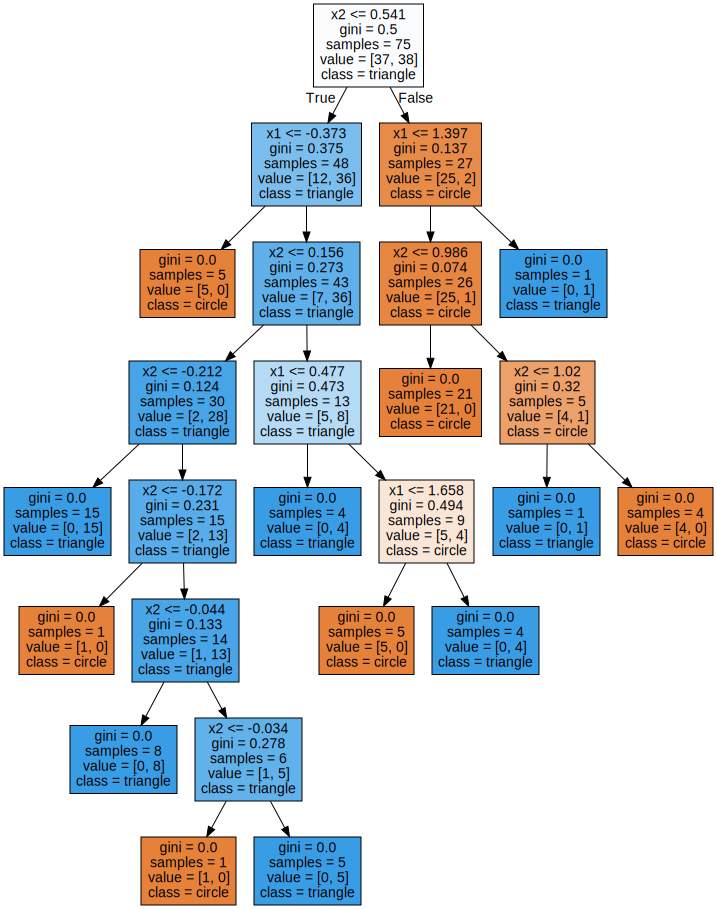

In [6]:
dot_data = export_graphviz(clf, out_file=None,
                          class_names = ["circle", "triangle"],
                          feature_names = ["x1", "x2"],
                          filled=True)

graph = graphviz.Source(dot_data)
graph

... and the *pydotplus* module to control the size of the printed tree:

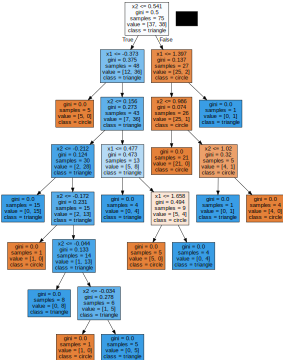

In [7]:
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"5,5!"')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

When we only have two features, as in the moons-data, we can also visualize the classifier in another way - namely by plotting the decision boundary:

<AxesSubplot:>

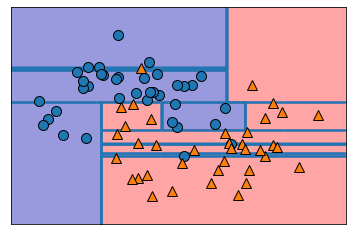

In [9]:
mglearn.plots.plot_tree_partition(X_train, y_train, clf)

In [10]:
print("Train accuracy: {}".format(clf.score(X_train, y_train)))
print("Test accuracy: {}".format(clf.score(X_test, y_test)))

Train accuracy: 1.0
Test accuracy: 0.92


This is a clear example of overfitting! In order to avoid this, we can control a number of hyperparameters, including:
- The maximum number of questions any given branch is allowed to ask: **max_depth** (default: *None*)
- The maximum number of leafs: **max_leaf_nodes**
- The minimum samples a node should contain to allow it to be split: **min_samples_split** (default: *2*)
- (the splitting criterion): **criterion** (default: *Gini*)

Tuning these parameters is called *pre-pruning*.

You can read about all the hyperparameters in the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## Pre-pruning

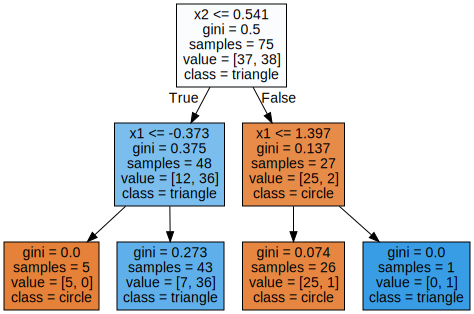

In [22]:
clf = DecisionTreeClassifier(max_depth = 2, random_state = 42)
clf.fit(X_train, y_train)
dot_data = export_graphviz(clf, out_file=None,
                          class_names = ["circle", "triangle"],
                          feature_names = ["x1", "x2"],
                          filled=True)

graph = graphviz.Source(dot_data)
graph

<AxesSubplot:>

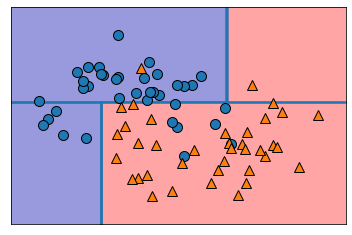

In [23]:
mglearn.plots.plot_tree_partition(X_train, y_train, clf)

In [25]:
print("Train accuracy: {}".format(clf.score(X_train, y_train)))
print("Test accuracy: {}".format(clf.score(X_test, y_test)))

Train accuracy: 0.8933333333333333
Test accuracy: 0.88
